# Задача:

Проанализировать данные по выживаемости. Обучить модель предсказания выживет ли человек или нет (ключевая переменная) (различные варианты визуализации можно посмотреть здесь https://www.kaggle.com/competitions/titanic/code?competitionId=3136&sortBy=scoreDescending&language=Python).
Определить наиболее значимые переменные которые влияют на выживаемость. 
Визуализировать дерево решений. 
Написать вывод. 
Не копировать бездумно чужие работы. 


Ответить на вопросы (обоснованно).

1. Как влияет размер семьи  на вероятность виживаемости (одинокие выживают чаще или нет?, люди у которых большая семья (больше 4) выживают чаще или нет).
2. Как влияет пол/возраст/номер палубы. 


In [1]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 80)

In [2]:
# Считываем файл с данными train
train_data = pd.read_csv("./titanic_train.csv", index_col= "PassengerId")
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [3]:
# Считываем файл с данными test
test_data = pd.read_csv("./titanic_test.csv", index_col= "PassengerId")
test_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [4]:
# Общая статистика выживания
survived = train_data[train_data['Survived'] == 1]
not_survived = train_data[train_data['Survived'] == 0]

print ("Survived: %i (%.1f%%)"%(len(survived), float(len(survived))/len(train_data)*100.0))
print ("Not Survived: %i (%.1f%%)"%(len(not_survived), float(len(not_survived))/len(train_data)*100.0))
print ("Total: %i"%len(train_data))

Survived: 342 (38.4%)
Not Survived: 549 (61.6%)
Total: 891


In [8]:
# Статистика выживания по классам
train_data.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

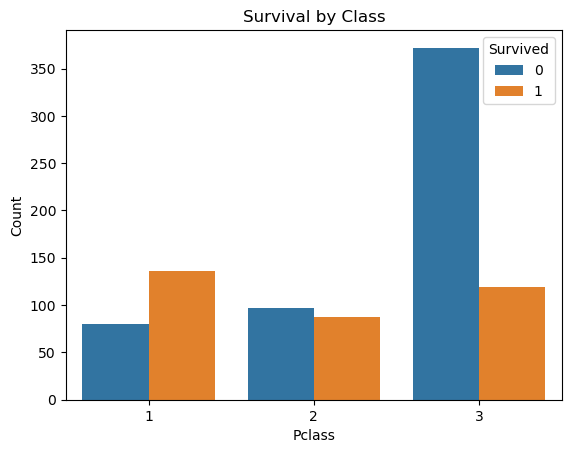

In [6]:
# Визуализация выживаемости по классу
sns.countplot(data=train_data, x='Pclass', hue='Survived')
plt.title('Survival by Class')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

In [9]:
train_data.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

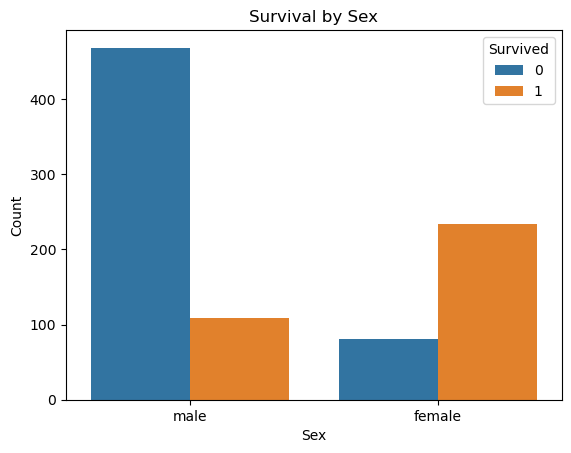

In [10]:
# Визуализация выживаемости по полу
sns.countplot(data=train_data, x='Sex', hue='Survived')
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [11]:

train_data.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: count, dtype: int64

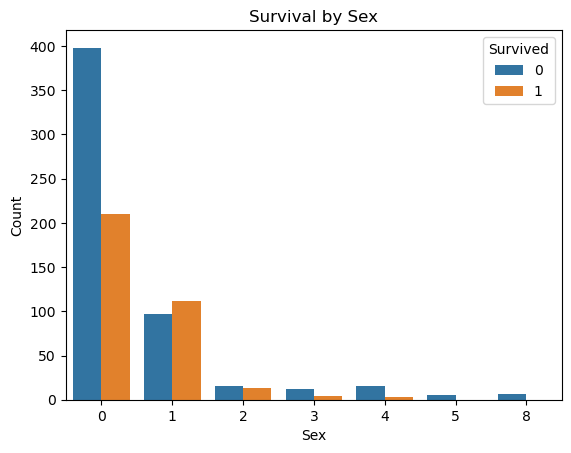

In [12]:
# Визуализация выживаемости по количеству родсвенников
sns.countplot(data=train_data, x='SibSp', hue='Survived')
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

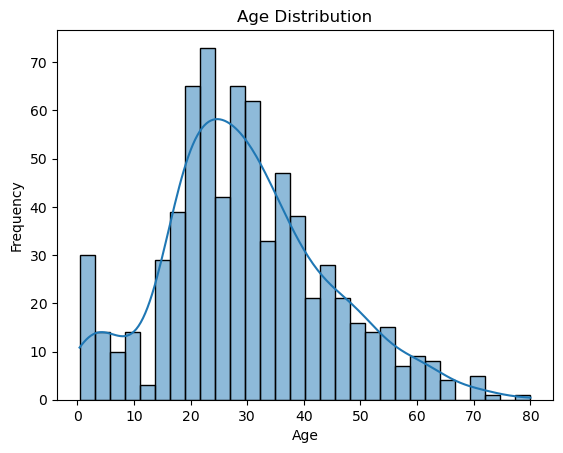

In [14]:
# Гистограмма возрастов
sns.histplot(train_data['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

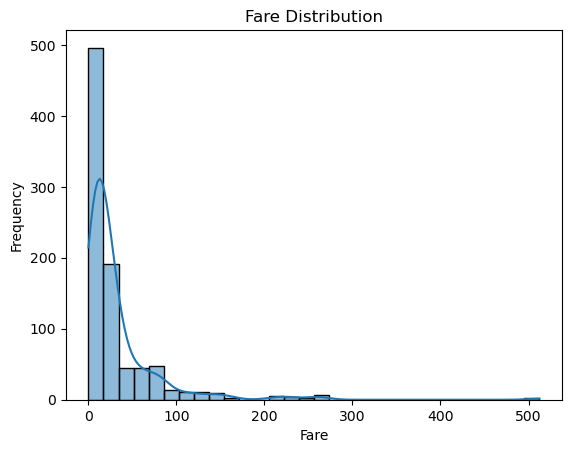

In [15]:


# Гистограмма тарифов
sns.histplot(train_data['Fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


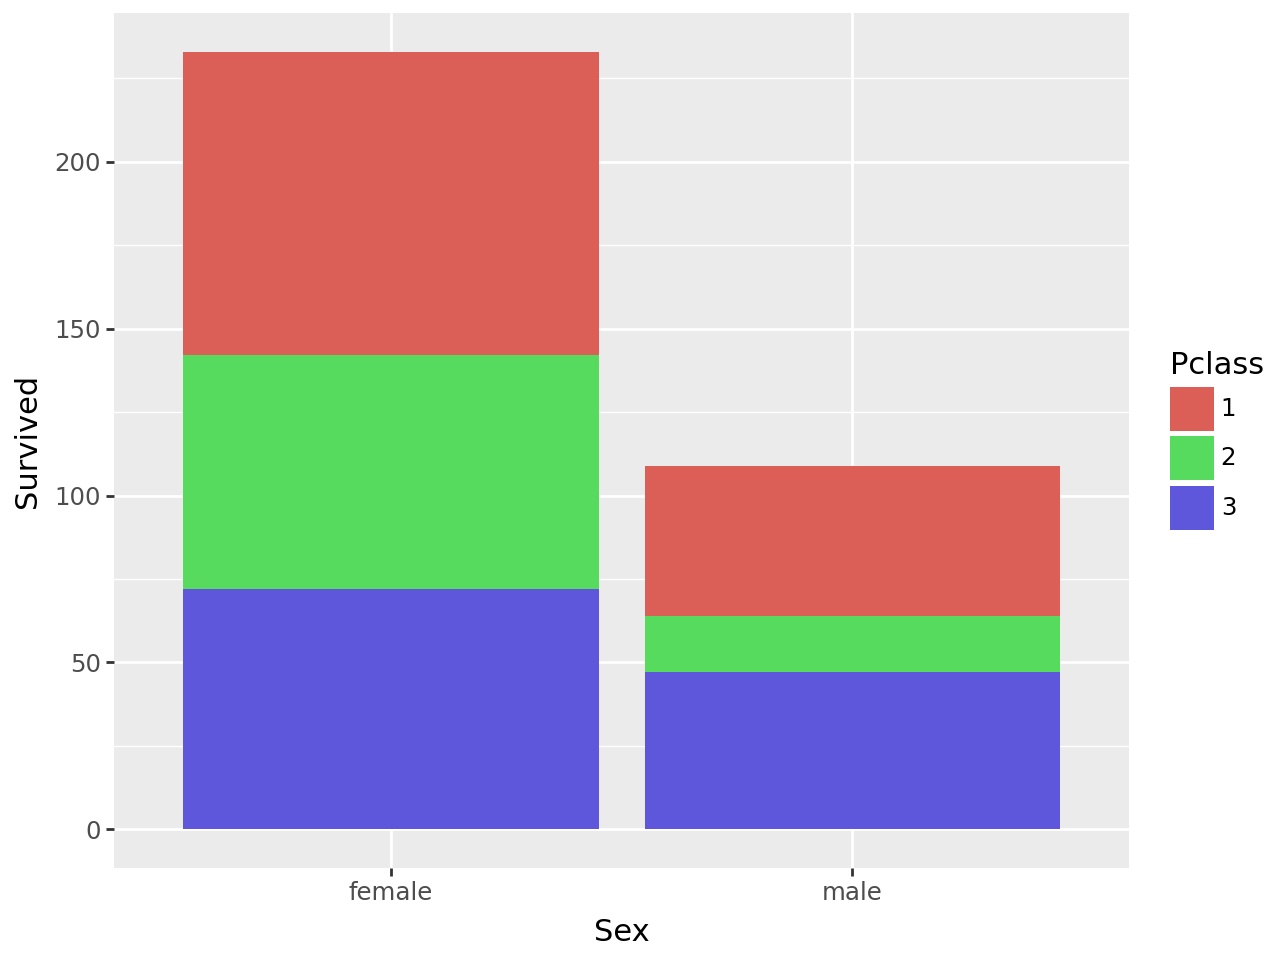

In [46]:
# Отобразим количество выживших по полу и классу
train_data['Pclass'] = train_data['Pclass'].astype('str')
from plotnine import *
(ggplot(train_data)
 + aes(x='Sex', y='Survived', fill='Pclass')
 + geom_col()
)

c:\ProgramData\anaconda3\Lib\site-packages\plotnine\layer.py:344: PlotnineWarning: position_stack : Removed 177 rows containing missing values.
c:\ProgramData\anaconda3\Lib\site-packages\plotnine\positions\position.py:232: PlotnineWarning: position_stack requires non-overlapping x intervals


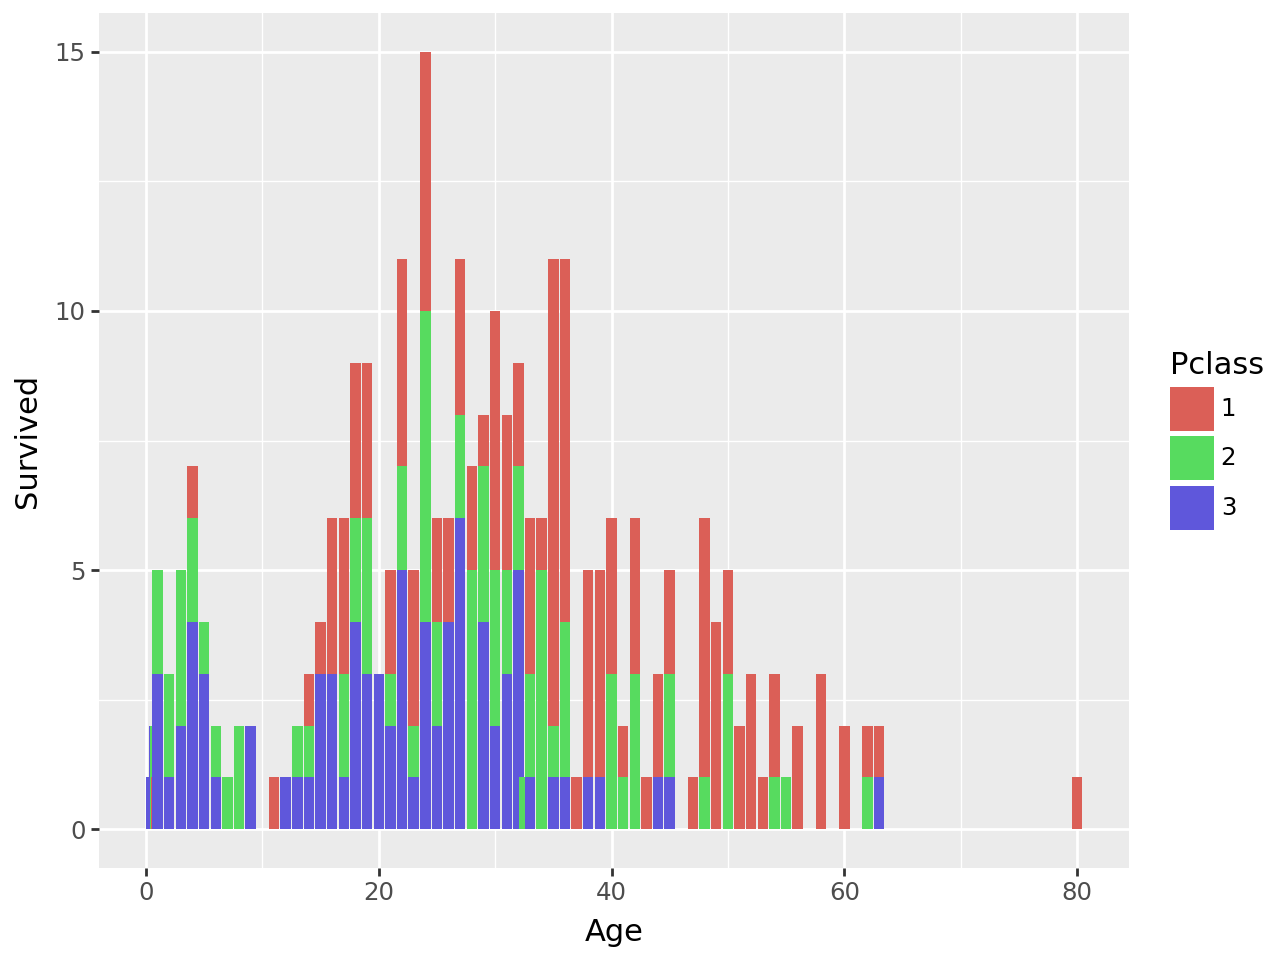

In [47]:
# Отобразим количество выживших по возрасту и классу
(ggplot(train_data)
 + aes(x='Age', y='Survived', fill='Pclass')
 + geom_col()
)

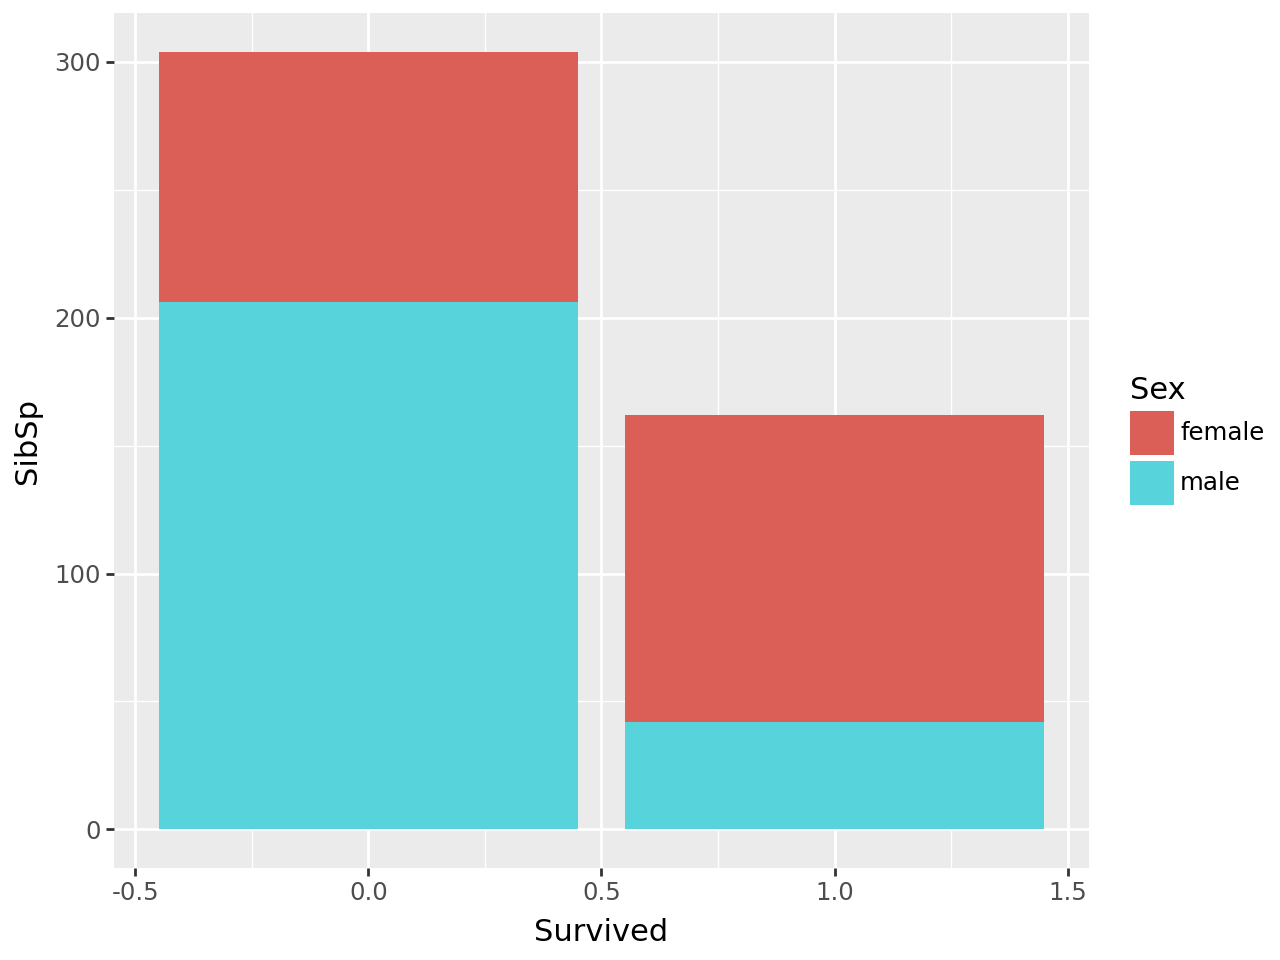

In [52]:
# Визуализация по количество Братьев/Супругов на борту
(ggplot(train_data)
 + aes(x='Survived', y='SibSp', fill='Sex')
 + geom_col()
)

In [91]:
# Кодируем столбец 'Sex'
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
test_data['Sex'] = label_encoder.transform(test_data['Sex'])

# Удалим неинформативные столбцы
y = train_data["Survived"]
train_data = train_data.drop(['Survived', 'Embarked',  'Ticket', 'Cabin', 'Name'], axis=1)
test_data = test_data.drop(['Embarked',  'Ticket', 'Cabin', 'Name'], axis=1)
train_data

,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,3,1,22.0,1,0,7.2500
2,1,0,38.0,1,0,71.2833
3,3,0,26.0,0,0,7.9250
4,1,0,35.0,1,0,53.1000
5,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,2,1,27.0,0,0,13.0000
888,1,0,19.0,0,0,30.0000
889,3,0,NaN,1,2,23.4500


In [125]:
#  Построим модель RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Разделим тренировочные данные на train/test
X_train, X_test, y_train, y_test = train_test_split(train_data, y,
                                                random_state=0)
model = RandomForestClassifier(max_depth=10, n_estimators=50, max_features=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Проверим скор на тестовой выборке
score = model.score(X_test, y_test)
score

0.852017937219731

In [131]:
# Предсказание на test_data
predictions = model.predict(test_data)
output = pd.DataFrame({'Survived': predictions}, index= test_data.index)
output

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [154]:
# Используем GridSearchCV для поиска оптимальных параметров
from sklearn.model_selection import GridSearchCV
grid = {'max_depth': [5,10,15],"n_estimators":[10,25,50,75,100],'criterion':['gini', 'entropy', 'log_loss']}
gridsearch = GridSearchCV(model, grid, scoring='f1_macro', cv=3, n_jobs=-1)

In [155]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(max_depth=10, max_features=1,
                                              n_estimators=50),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [10, 25, 50, 75, 100]},
             scoring='f1_macro')

In [156]:
gridsearch.best_params_

{'criterion': 'log_loss', 'max_depth': 10, 'n_estimators': 75}

In [159]:
# GridSearchCV подобрал не лучшие параметры(скор ниже, чем вручную)
gridsearch.best_score_

0.799091439452642

In [160]:
ypred = gridsearch.predict(X_test)

In [161]:
# Метрики классификатора
from sklearn import metrics
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88       146
           1       0.76      0.83      0.80        77

    accuracy                           0.85       223
   macro avg       0.83      0.85      0.84       223
weighted avg       0.86      0.85      0.85       223



In [166]:
# Используем кросс-валидацию

from sklearn.model_selection import cross_val_score
md = cross_val_score( model, X_train, y_train, cv = 5, scoring = 'accuracy')
md

array([0.79850746, 0.8358209 , 0.80597015, 0.81203008, 0.84962406])

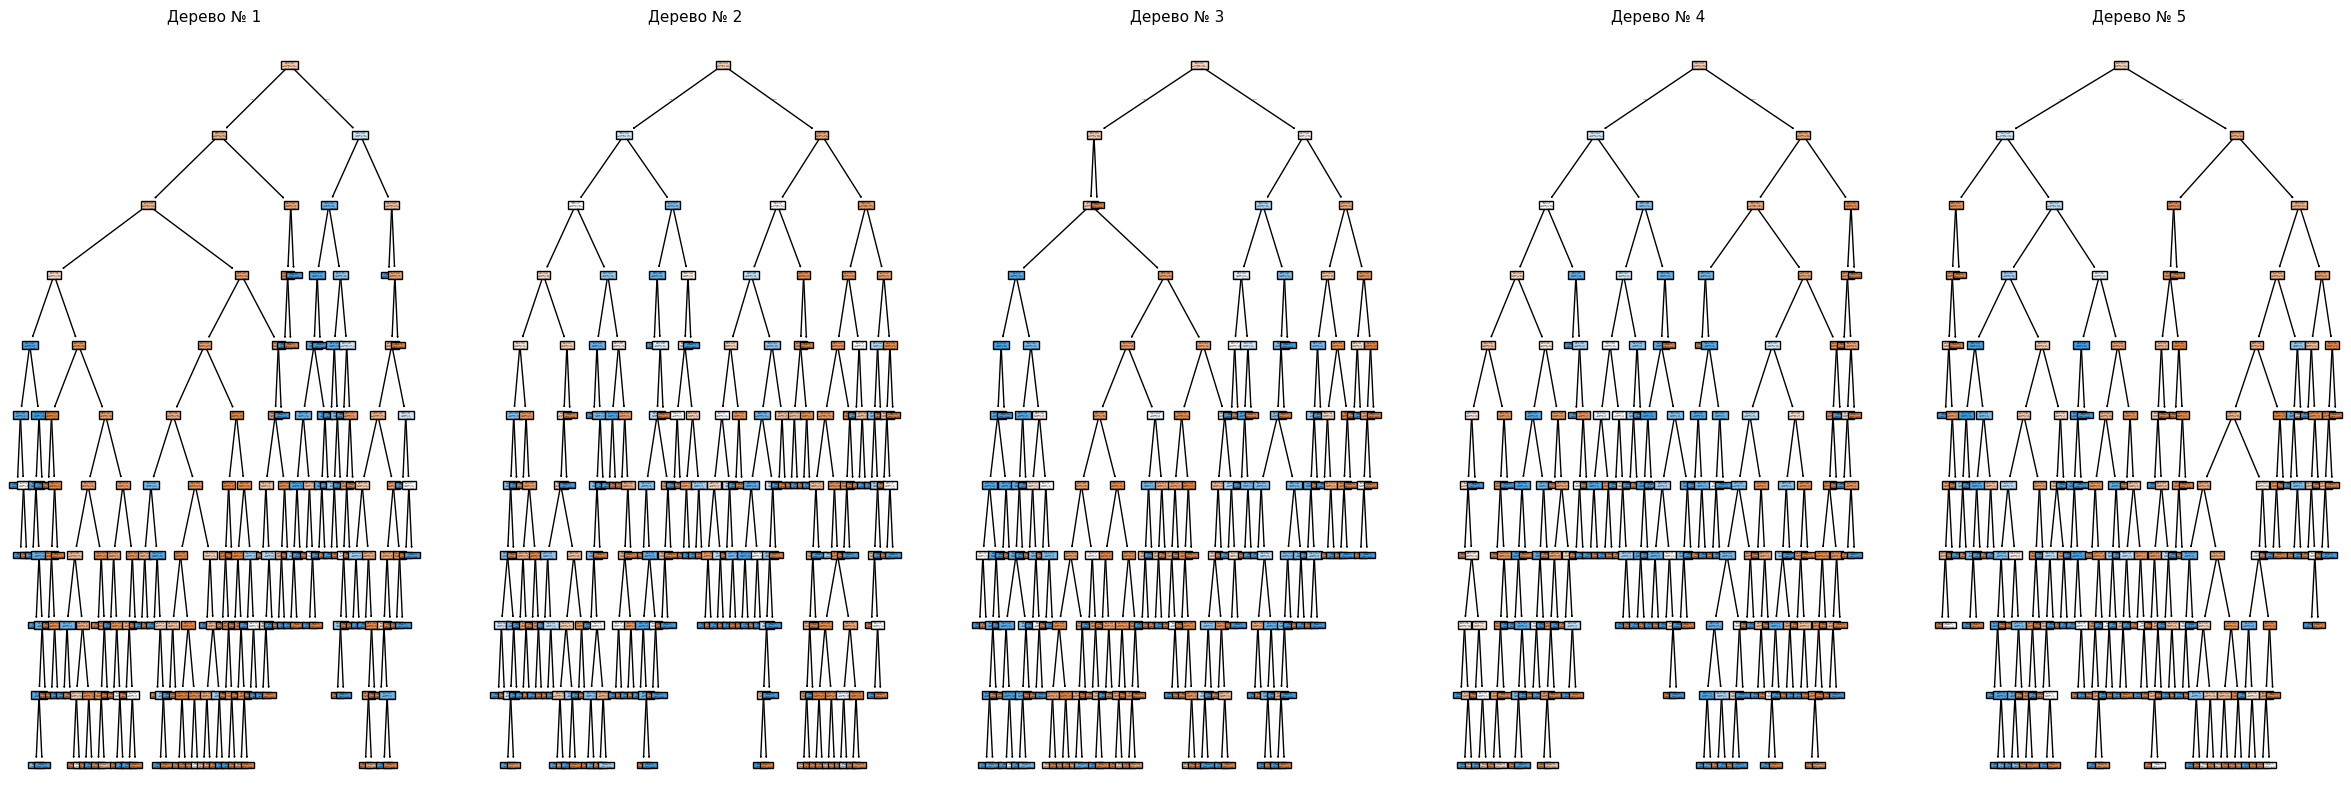

In [172]:
# Визуализация решений

from sklearn.tree import plot_tree
plt.figure(figsize=(10,15))
fn = [i for i in X_train.columns]
cn = ['Выживет', 'Не выживет']
# обозначим набор графиков для вывода нескольких деревьев
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (30,10))

for index in range(0, 5):
    # Построение графика 1 дерева, выбираем по индексу из общей модели   
    plot_tree(model.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Дерево № ' + str(index+1), fontsize = 11)
fig

# Вывод:
1. Пассажиры более высокого класса имеют бОльшие шансы на спасение.
2. Женщины имеют бОльшие шансы на спасение.
3. Те, у кого был 1 или 2 родственника имели больший шайнс на спасение.
4. Молодые люди имели больший шанс спастись.
5. Пассажиры с более дорогими билетами имели больший шанс на спасение.
6. Наиболее значимыми параметрами можно назвать пол, возраст и стоимость билета.